In [13]:
import pandas as pd
cars_ds = pd.read_csv('https://raw.githubusercontent.com/joestubbs/coe379L-sp24/master/datasets/unit01/project1.data')

In [14]:
#Problem 1 Shape 
cars_ds.shape

(398, 9)

In [15]:
##Problem 1 size
cars_ds.size

3582

In [16]:
cars_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [17]:
cars_ds['car_name'] = cars_ds['car_name'].astype('string')
#Convert car names to strings

In [18]:
cars_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    string 
dtypes: float64(3), int64(4), object(1), string(1)
memory usage: 28.1+ KB


In [19]:
#Problem 1 data missing?
cars_ds.isnull().sum()
#Nothing appears lets double check using unique

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [20]:
cars_ds['horsepower'].unique()
#We can see a ? representing null values

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [21]:
ind = cars_ds[cars_ds['horsepower'] == '?'].index
cars_ds[cars_ds['horsepower'] == '?']
#Get the data for these null values

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [22]:
#Replacing the question marks with null values now
import numpy as np
cars_ds.replace('?', np.nan, inplace = True)

In [23]:
#Check it worked and we see it does
cars_ds.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [24]:
#cast horsepower to numeric
cars_ds['horsepower'] = pd.to_numeric(cars_ds['horsepower'])

In [25]:
#horsepower column is now numeric
cars_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    string 
dtypes: float64(4), int64(4), string(1)
memory usage: 28.1 KB


In [26]:
#replace null values with mean
cars_ds['horsepower'].fillna(cars_ds['horsepower'].mean() ,inplace = True)

/tmp/ipykernel_2842/573495210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_ds['horsepower'].fillna(cars_ds['horsepower'].mean() ,inplace = True)


In [27]:
#Lets check that one of the nan indices from [87] are now corrected and as we see they are
for i in ind:
    print(cars_ds[cars_ds.index == i]["horsepower"])

32    104.469388
Name: horsepower, dtype: float64
126    104.469388
Name: horsepower, dtype: float64
330    104.469388
Name: horsepower, dtype: float64
336    104.469388
Name: horsepower, dtype: float64
354    104.469388
Name: horsepower, dtype: float64
374    104.469388
Name: horsepower, dtype: float64


In [28]:
#Lets also check duplicated values
cars_ds.duplicated().sum()

0

<Axes: xlabel='mpg', ylabel='Count'>

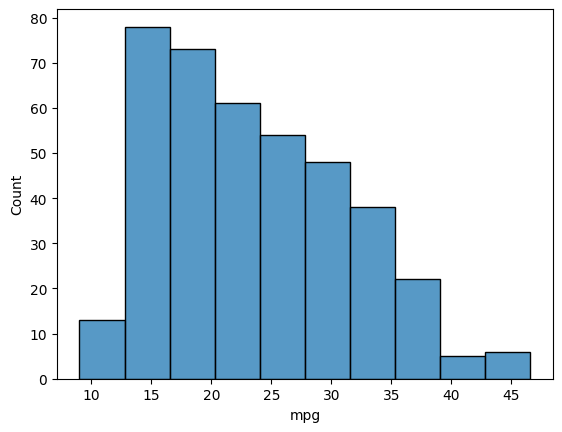

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt 
#fun little plot 
sns.histplot(data=cars_ds['mpg'], bins=10)


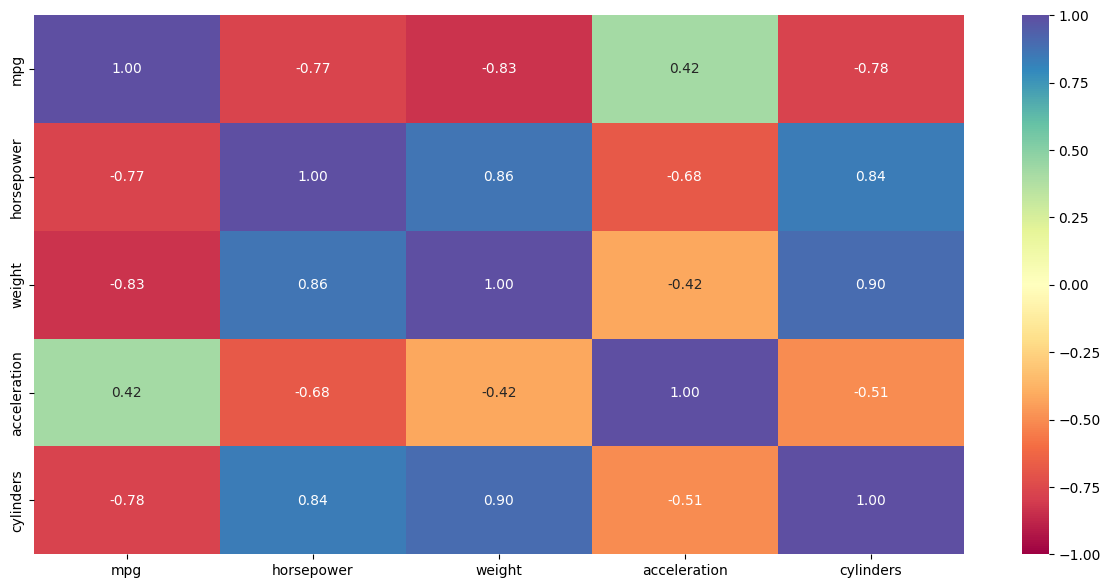

In [30]:
#Finding correlations between the columns
# columns to correlate
corr_cols=['mpg','horsepower','weight', 'acceleration','cylinders']

# increate the figure size
plt.figure(figsize=(15, 7))

# the actual heat map
sns.heatmap(
   cars_ds[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

# show the plot
plt.show()

#choosing the variables 'horsepower','weight', 'acceleration', and 'cylinders' as they all contribute to the mpg

In [31]:
#Now to fit a model
import sklearn 
from sklearn.model_selection import train_test_split
#drop none numeric columns that only serve to label the data X = 'horsepower','weight', 'acceleration', and 'cylinders'
X = cars_ds.drop(['model_year', 'origin', 'car_name'], axis = 1)
y = cars_ds['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [32]:
#fit the linear model
from sklearn.linear_model import LinearRegression
cars_lr = LinearRegression()
cars_lr.fit(X_train, y_train)

LinearRegression()

In [33]:
cars_lr.predict(X_test)

array([18. , 28.1, 19.4, 20.3, 20.2, 16. , 29. , 37.7, 15.5, 12. , 29. ,
       17. , 18.1, 21.5, 39.1, 22. , 15. , 20. , 12. , 31.8, 24. , 29. ,
       21. , 27. , 24.3, 26. , 32.4, 32.8, 17. , 26. , 25. , 14. , 21. ,
       27.5, 24.5, 13. , 26. , 12. , 32. , 25. , 25. , 25.5, 17.6, 33. ,
       26.8, 20.6, 18.5, 13. , 29. , 18.5, 27. , 27.9, 13. , 13. , 33.5,
       28. , 11. , 14. , 32. , 38. , 36. , 32. , 17.5, 23.5, 18.5, 41.5,
       28.8, 20.2, 27.2, 14. , 16.5, 22. , 14. , 27.4, 14. , 28. , 36.4,
       15.5, 14. , 26. , 23. , 14. , 37. , 21. , 32.3, 16.5, 15. , 19.4,
       29.8, 34.5, 15.5, 19. , 20. , 27.2, 29. , 18. , 33.8, 25. , 23. ,
       17.6, 22. , 11. , 15. , 38.1, 13. , 19.9, 32.1, 24. , 30.7, 13. ,
       16. , 37. , 23.7, 18. , 20. , 34. , 14. , 24. , 23.2, 39.4])

In [34]:
atest = cars_lr.score(X_test, y_test)
# Check accuracy on the training data
atrain = cars_lr.score(X_train,y_train)
print(str(atest) + ' ' + str(atrain))

1.0 1.0


In [35]:
#As we can see the above scores are 100% accuracy which is correct if we compare
print(X_test)

      mpg  cylinders  displacement  horsepower  weight  acceleration
174  18.0          6         171.0        97.0    2984          14.5
359  28.1          4         141.0        80.0    3230          20.4
250  19.4          8         318.0       140.0    3735          13.2
274  20.3          5         131.0       103.0    2830          15.9
283  20.2          6         232.0        90.0    3265          18.2
..    ...        ...           ...         ...     ...           ...
382  34.0          4         108.0        70.0    2245          16.9
39   14.0          8         400.0       175.0    4464          11.5
171  24.0          4         134.0        96.0    2702          13.5
271  23.2          4         156.0       105.0    2745          16.7
247  39.4          4          85.0        70.0    2070          18.6

[120 rows x 6 columns]


In [ ]:
#Which of the above measures is more relevant for this problem statement?
#The step in which we calculated accuracy wasn't necessarily important as accuracy is more 
#often than not associated with classification models
#For linear regression using some other metric for accuracy such as mean squared error would be better.